<a href="https://colab.research.google.com/github/sgr1118/FD/blob/main/FD13_Basic_Opencv(220718).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

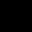

In [ ]:
# 13-3. Pillow 사용법
import numpy as np
from PIL import Image

data = np.zeros([32,32,3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image

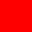

In [ ]:
# 모든 픽셀의 색상 변경 
data[:,:] = [255,0,0]
image = Image.fromarray(data, 'RGB')
image

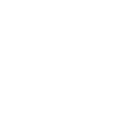

In [ ]:
# 픽셀 이미지 만들어보기
data = np.zeros([128,128,3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')

data[:,:] = [255,255,255] # 세가지 색을 모두 255로하면 하얀색이 나온다
image = Image.fromarray(data, 'RGB')
image

In [ ]:
# 연습용 이미지를 열어 width와 height를 출력하고, 
#.save()를 이용하여 jpg 파일 포맷으로 저장해 봅시다.

from PIL import Image

# 연습용 파일결로
path = '/content/pillow_practice.png'
# 이미지열기
#image1 = Image(filename='pillow_practice.png')
#display(image1)
img = Image.open(path)
img

# width와 height 출력
#print(img.width) # 620
#print(img.height) # 465

# JPG 파일 형식으로 저장해보기
new_image_path = '/content/pillow_practice.jpg'
img = img.convert('RGB')
img.save(new_image_path)

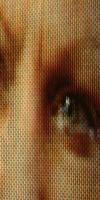

In [ ]:
# resize()를 이용하여 이미지 크기를 100X200으로 변경하여 저장해봅시다.
from PIL import Image
path = '/content/pillow_practice.png'

img = Image.open(path)

img_re = img.resize((100, 200))
path2 = '/content/pillow_practice_re.jpg'
img_re = img_re.convert('RGB')
img_re.save(path2)

img2 = Image.open(path2)
img2

In [ ]:
# crop()을 이용하여 눈 부분만 잘라내어 저장해 봅시다.
# 눈 부분의 box 좌표 300, 100, 600, 400

from PIL import Image
path = '/content/pillow_practice.png'

img = Image.open(path)

area = (300, 100, 600, 400)
crop_img = img.crop(area)

path2 = '/content/pillow_practice_crop_eye.jpg'
img_crop = img_re.convert('RGB')
img_crop.save(path2)

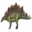

In [ ]:
# 13-4. Pillow를 활용한 데이터 전처리
import os
import pickle
from PIL import Image

path = '/content/train'
with open(path, 'rb') as f:
  train = pickle.load(f, encoding = 'bytes')

#print(type(train))
#print(train)

# train key 확인
#train.keys() # dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
#type(train[b'filenames']) # 리스트형
#train[b'filenames'][:5]
#train[b'data'][0].shape # (3072,)
# 이미지 파일에서 3072라는 의미는 R, G, B 3채널 * 1024(32*32)씩 각 화소에 해당

# 이미지 reshape해서 출력하기
image_data = train[b'data'][1].reshape([32,32,3], order='F')
#image = Image.fromarray(image_data)
#image

image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

In [ ]:
# 사진 순서대로 출력해서 저장하기
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

# 경로 지정
path = '/content/train'

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다.
dir_path = '/content/cifar-images'
if not os.path.exists(dir_path):
    os.mkdir(dir_path)

# 32X32의 이미지 파일 50000개를 생성합니다.
with open(path, 'rb') as f:
  train = pickle.load(f, encoding = 'bytes')
  for i in tqdm(range(len(train[b'filenames']))):
    img = train[b'filenames'][i].decode()
    data = train[b'data'][i].reshape([32, 32, 3], order='F')
    image = Image.fromarray(data.swapaxes(0, 1))
    image.save(os.path.join(dir_path, img))

100%|██████████| 50000/50000 [00:21<00:00, 2352.45it/s]


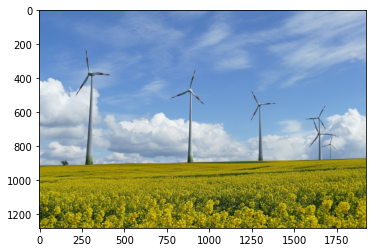

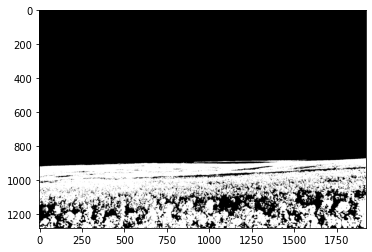

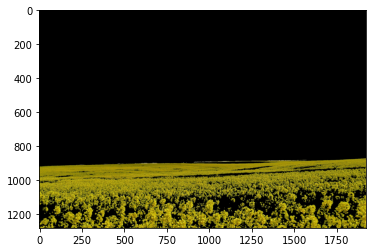

In [ ]:
# 13-5. OpenCV (1) 안녕, OpenCV
# 연습용 코드
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

path = '/content/cv_practice.png'
img = cv.imread(path)

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
#lower_blue = np.array([100,100,100])
#upper_blue = np.array([130,255,255])
lower_yellow = (20, 20, 100)
upper_yellow = (32, 255, 255)
# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

# Bitwise-AND mask and original image
res = cv.bitwise_and(img, img, mask=mask)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

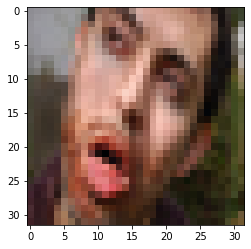

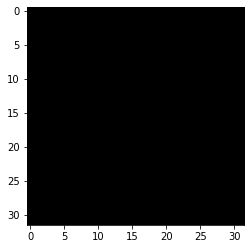

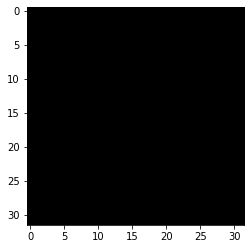

In [ ]:
# 13-5. OpenCV (1) 안녕, OpenCV
# 연습용 코드
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

path = '/content/cifar-images/abel_s_000083.png'
img = cv.imread(path)

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
#lower_blue = np.array([100,100,100])
#upper_blue = np.array([130,255,255])
lower_orange = (100, 200, 200)
upper_orange = (140, 255, 255)
# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_orange, upper_orange)

# Bitwise-AND mask and original image
res = cv.bitwise_and(img, img, mask=mask)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 13-7. 실습 : 비슷한 이미지 찾아내기
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
dir_path = '/content'
train_path = '/content/train'
images_dir_path = '/content/cifar-images'

In [ ]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

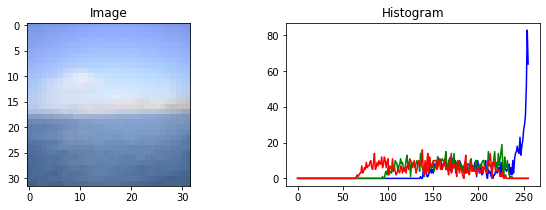

In [ ]:
draw_color_histogram_from_image('adriatic_s_001807.png')

In [ ]:
# 13-4. 실습 
# 사진을 변경하고,
# 원하는 색을 찾아본다!

